In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline        
import japanize_matplotlib   

# ニューラルネットワークとは

![画像を表示できません。](image.png)

## 入力層・中間層・出力層

最初の層を**入力層**、最後の層を**出力層** 、その間にある層を**中間層**または**隠れ層**という。

## 信号の伝達

$w$は重み、$x$は信号、$h()$は活性化関数。<br>
$x_0w_0$について、$x_0$は常に1であり、$x_0w_0$はバイアス（$b$）である。

$$a=b+w_1x_1+w_2x_2+\cdots+w_nx_n$$
$$y=h(a)$$

# 活性化関数

入力信号の総和がどのように活性化するかを決定する。<br><br>
多層化する恩恵を受けるために、活性化関数には非線形関数を使う必要がある。<br>
ニューラルネットワークでは滑らかに変化する関数を利用する。

## ステップ関数

パーセプトロンではニューロン間を0か1の二値の信号が流れる。

$$h(x)=\begin{cases}
    1 & (x > 0) \\
    0 & (x \leqq 0)
  \end{cases}$$

In [2]:
def step_function(x):
    return np.array(x > 0, dtype=np.int_)

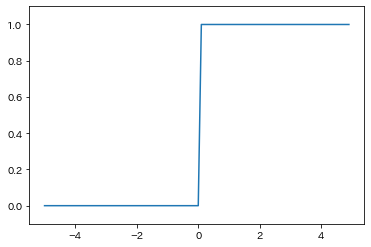

In [3]:
x = np.arange(-5.0, 5.0, 0.1) #-5.0から5.0まで0.1刻みで
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y軸の範囲指定
plt.show()

## シグモイド関数

滑らかな関数。連続的な実数値の信号が流れるニューラルネットワークにおいて重要な関数。古くからニューラルネットワークに用いられてきた。<br>
2クラス分類問題における出力層の活性化関数として使われることが多い。

$$h(x)=\frac{1}{1+e^{-x}}$$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

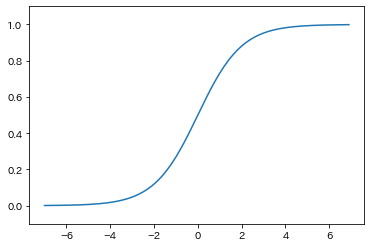

In [5]:
x = np.arange(-7.0, 7.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## ReLU関数

最近、ニューラルネットワークで主に用いられる関数。<br>
0以下の入力には0を返し、0より大きい入力には入力値と同じ値を出力する。

$$h(x)=\begin{cases}
    x & (x > 0) \\
    0 & (x \leqq 0)
  \end{cases}$$

In [6]:
def relu(x):
    return np.maximum(0, x)

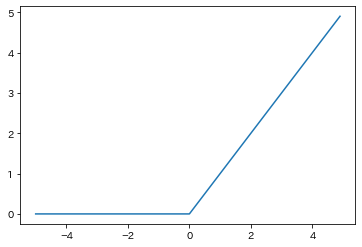

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

## 恒等関数

入力値をそのまま出力する。回帰問題の出力層の活性化関数として利用する。出力層の活性化関数は隠れ層の活性化関数$h()$とは区別して$\sigma()$とする。

$$h(x)=x$$

In [8]:
def identity_function(x):
    return x

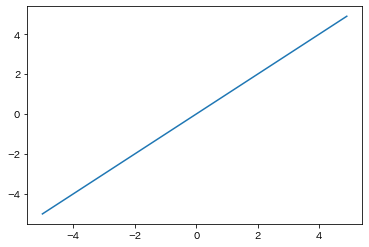

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = identity_function(x)
plt.plot(x, y)
plt.show()

## ソフトマックス関数

他クラス分類問題の出力層の活性化関数として利用される。出力の各ニューロンが、すべての入力信号から影響を受ける。

$$y_k=\frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)}$$

指数関数の値は容易に大きくなり、無限大（`inf`）となることもある。大きな値どうしで割り算をすると数値が不安定になるため、工夫が必要。

$$\begin{align}
y_k=\frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)} &= \frac{C\exp(a_k)}{C\sum_{i=1}^{n}\exp(a_i)} \\\\
&= \frac{\exp(a_k+\log C)}{\sum_{i=1}^{n}\exp(a_i+\log C)} \\\\
&= \frac{\exp(a_k+C')}{\sum_{i=1}^{n}\exp(a_i+C')}
\end{align}$$

入力信号の最大値を引くことで、オーバーフローを防ぐ。

In [10]:
def softmax(a):
    c = np.max(a) #入力信号の最大値を取得
    exp_a = np.exp(a - c) #オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

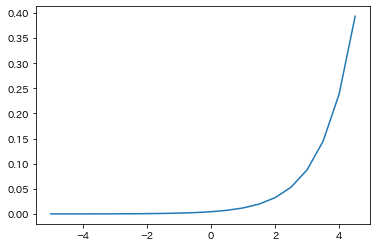

In [11]:
x = np.arange(-5.0, 5.0, 0.5)
y = softmax(x)
plt.plot(x, y)
plt.show()

ソフトマックス関数では、出力が0から1の実数値となり、また出力の総和は1になるため、出力結果を確率として解釈できる。

In [12]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

また指数関数 $y=e^x$ は単調に増加するため、ソフトマックス関数の適用前後で各要素の大小関係は変わらない。<br><br>
クラス分類では、出力が一番大きいニューロンに相当するクラスを識別結果とすることや、指数関数の計算の高い計算コストのために、<br>
分類問題の出力層のソフトマックス関数は省略するのが一般的。

# 実装

## 多次元配列

行列の積の計算
$$
\begin{pmatrix}
1 & 2 \\
3 & 4 
\end{pmatrix}
\begin{pmatrix}
5 & 6 \\
7 & 8 
\end{pmatrix}=
\begin{pmatrix}
19 & 22 \\
43 & 50 
\end{pmatrix}$$

In [13]:
# Pythonで実装
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

## ニューラルネットワークの計算

ニューラルネットワークの各層の計算は、行列の積としてまとめて行うことができる。

$a_k^{(n)}$が第$n$層目、$k$番目のニューロン、<br>
$b_k^{(n)}$が第$n$層目の、k番目のニューロンへのバイアス、<br>
$w_{kl}^{(n)}$が第$n$層目の、前層$l$番目のニューロンから次層$k$番目のニューロンへの重み、<br>
$x_k$がk番目の入力値（渡された値）、<br>
$h()$が活性化関数を表すとすると、

$$A^{(1)}=\begin{pmatrix}a_1^{(1)} & a_2^{(1)} & a_3^{(1)}\end{pmatrix},
X=\begin{pmatrix}x_1 & x_2\end{pmatrix},
B^{(1)}=\begin{pmatrix}b_1^{(1)} & b_2^{(1)} & b_3^{(1)}\end{pmatrix},
W^{(1)}=\begin{pmatrix}w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ 
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}\end{pmatrix}$$

として、第1層目の「重み付き和」$A^{(1)}$が得られ、$Z^{(1)}$が次層へ渡される。

$$A^{(1)}=XW^{(1)}+B^{(1)}$$

$$Z^{(1)}=h(A^{(1)})$$

In [14]:
# Pythonで実装
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [15]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [16]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


以下で、ニューラルネットワークの全体の流れを記述する。

In [17]:
# 3層ニューラルネットワークの実装
def init_network():  #重みとバイアスの初期化
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):  #入力から出力方向への伝達処理
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 手書き数字認識

**load_mnist関数**
- Parameters
    - `normalize` : 画像のピクセル値を0.0~1.0に正規化する
    - `one_hot_label` : Trueの場合、ラベルはone-hot配列（`[0,0,1,0,0,0,0,0,0,0]`のような配列）として返す
    - `flatten` : 画像をNumpy配列の一次元配列に平にするかどうか
- Returns
    - (訓練画像, 訓練ラベル), (テスト画像, テストラベル)

In [18]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [19]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) #Numpy画像データをPIL用データオブジェクトに変換
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False) #一次元配列にする

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) #元の形状に再変形
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 推論処理

推論処理を行うニューラルネットワークを実装する。<br><br>
入力層は784個（画像サイズ）、出力層は10個（10クラス分類）、2つの隠れ層（任意）のうち、1つ目隠れ層は50個（任意）、2つ目の隠れ層は100個（任意）のニューロンで構成される。

In [20]:
import pickle

def get_data(): #前処理
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network(): #sample_weight.pklに保存の学習済み重みパラメータを読み込む
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x): #順方向伝播
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [21]:
%%time

x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) #最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
CPU times: user 935 ms, sys: 2.09 s, total: 3.03 s
Wall time: 891 ms


以下で、対応する要素数が一致することを確認する。（バイアスは省略）

In [22]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)
print(y.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)
(10,)


$$
\begin{pmatrix}
x_{1\,1} & \cdots & x_{1\,784}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(1)} & \cdots & w_{50\,1}^{(1)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,784}^{(1)} & \cdots & w_{50\,784}^{(1)}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(2)} & \cdots & w_{100\,1}^{(2)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,50}^{(2)} & \cdots & w_{100\,50}^{(2)}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(3)} & \cdots & w_{10\,1}^{(3)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,100}^{(3)} & \cdots & w_{10\,100}^{(3)}\end{pmatrix}
=
\begin{pmatrix}
y_{1\,1} & \cdots & y_{1\,10}\end{pmatrix}
$$

$$784\qquad\qquad\qquad784\times50\qquad\qquad\qquad50\times100\qquad\qquad\qquad100\times10\qquad\qquad\qquad10$$

※バイアスは省略

### バッチ処理

ライブラリの多くは、大きな配列の計算を効率よく処理できるよう最適化されているため、<br>
複数の処理をまとめて行うと、処理時間を大きく短縮することができる。（バッチ処理）<br><br>
ここでは、100個の処理をまとめて行うために、`x`の形状を $100\times784$ とする。

$$
\begin{pmatrix}x_{1\,1} & \cdots & x_{1\,784} \\
\vdots & \ddots & \vdots \\
x_{100\,1} & \cdots & x_{100\,784}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(1)} & \cdots & w_{50\,1}^{(1)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,784}^{(1)} & \cdots & w_{50\,784}^{(1)}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(2)} & \cdots & w_{100\,1}^{(2)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,50}^{(2)} & \cdots & w_{100\,50}^{(2)}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(3)} & \cdots & w_{10\,1}^{(3)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,100}^{(3)} & \cdots & w_{10\,100}^{(3)}\end{pmatrix}
=
\begin{pmatrix}y_{1\,1} & \cdots & y_{1\,10} \\
\vdots & \ddots & \vdots \\
y_{100\,1} & \cdots & y_{100\,10}\end{pmatrix}
$$

$$100\times784\qquad\qquad\qquad784\times50\qquad\qquad\qquad50\times100\qquad\qquad\qquad100\times10\qquad\qquad\qquad100\times10$$

※バイアスは省略

In [23]:
%%time

x, t = get_data()
network = init_network()

batch_size = 100 #バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p= np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) #比較演算子（==）によってブーリアン配列を作成

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
CPU times: user 253 ms, sys: 453 ms, total: 706 ms
Wall time: 181 ms


バッチ処理の方が、約4〜5倍処理が速い。